<a target="_blank" href="https://colab.research.google.com/github/alejandrogtz/cccs630-fall2023/blob/main/module10/markov_models.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov Models

## Introduction

In this module, we will explore a different type of model, a Markov model. Markov models are useful for studying the behaviour or decisions of actors or agents in a complex system. 

In preparation for the interaction portion, please watch the following video published by Harvard Online.

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/JHwyHIz6a8A" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## Concepts

You will find a list of important concepts we will review in the module below.

- Markov chain
- Markov model
- Stochastic model
- Transition matrix

## Interaction

Markov models are mathematical representations of stochastic systems or processes that evolve over time. A stochastic system is a random system we can describe and study using probabilistic methods.

There are multiple types of Markov models. In this interaction, we will review the most fundamental type: Markov chains. A Markov chain consists of a sequence of states, transitions between these states, and a probability that the transition occurs. As a result, the connected states form a chain or network. The connections between states and transition probabilities are described using a transition matrix.

One of the main characteristics of Markov models is that the future state depends only on its current state and not on its previous states. This is known as the Markov property. Transitions between states are conditioned or dependent only on the state the system is in before the transition occurs.

For example, let's model a system with four states using a Markov chain: S<sub>1</sub>, S<sub>2</sub>, S<sub>3</sub>, and S<sub>4</sub>. The transition probabilties of this four states system can be represented using the following matrix.

$$
P = \begin{pmatrix}
p_{11} & p_{12} & p_{13} & p_{14} \\
p_{21} & p_{22} & p_{23} & p_{24} \\
p_{31} & p_{23} & p_{33} & p_{34} \\
p_{41} & p_{24} & p_{43} & p_{44}
\end{pmatrix}
$$

Then, the probabilities are replaced with actual numerical values obtained from the system, as in the following matrix. The sum of the probabilities of each row should total 1, which represents 100%.

$$
P = \begin{pmatrix}
0.2 & 0.3 & 0.4 & 0.1 \\
0.3 & 0.2 & 0.1 & 0.4 \\
0.4 & 0.1 & 0.3 & 0.2 \\
0.1 & 0.4 & 0.2 & 0.3 \\
\end{pmatrix}
$$

Now, let's assume the system is in stage S<sub>2</sub>. This means we must use the probabilities of the second row in the matrix. If we want to predict the next stage of the system, there is a 30% probability the next stage is S<sub>1</sub>, 20% the system will stay in S<sub>2</sub>, 10% of transitioning to S<sub>3</sub>, and 40% of transitioning to S<sub>4</sub> next.

### Instructions

- Create a Markov chain to study the web browsing behaviour of a user.
- Use the categories assigned to the visited domains to create the model.
- Select an initial state and predict the following states.
- Identify relevant user behaviour patterns. 

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation

In [3]:
rc('animation', html='html5') # Specify the type of animation to be rendered

In [4]:
data = pd.read_excel('module09_data.xlsx', sheet_name='data') # Load the data into Jupyter

In [5]:
panelist_ids = data.groupby('panelist_id').size().reset_index(name='counts') # Group users by ID

In [6]:
panelist_ids

,panelist_id,counts
0,1,4453
1,1137,3593


In [7]:
"""
Adjust the panelist_id value to select the user you want to analyze
"""
user_data = data[data['panelist_id'] == 1] # Filter a single user 

In [8]:
user_data

,id,prev_id,panelist_id,used_at,left_at,active_seconds,top_level_domain,category1,category2,category3
0,1009106048,0,1,2018-10-01 10:33:01,2018-10-01 10:33:39,38,myway.com,search-engines and portals,NaN,NaN
1,1009106052,1009106048,1,2018-10-01 10:33:39,2018-10-01 10:33:53,14,deutsche-bank.de,business,economy and finance,NaN
2,1009106056,1009106052,1,2018-10-01 10:33:53,2018-10-01 10:34:07,14,deutsche-bank.de,business,economy and finance,NaN
3,1009106060,1009106056,1,2018-10-01 10:34:07,2018-10-01 10:34:39,32,deutsche-bank.de,business,economy and finance,NaN
4,1009106064,1009106060,1,2018-10-01 10:34:39,2018-10-01 10:35:45,66,deutsche-bank.de,business,economy and finance,NaN
...,...,...,...,...,...,...,...,...,...,...
4448,1098495548,1098495544,1,2018-10-31 22:55:23,2018-10-31 22:55:47,24,ebay.de,business,shopping,NaN
4449,1098495552,1098495548,1,2018-10-31 22:55:47,2018-10-31 22:55:53,6,ebay.de,business,shopping,NaN
4450,1098495556,1098495552,1,2018-10-31 22:55:53,2018-10-31 22:56:05,12,ebay.de,business,shopping,NaN
4451,1098495560,1098495556,1,2018-10-31 22:56:05,2018-10-31 22:56:33,28,ebay.de,business,shopping,NaN


In [9]:
categories = user_data.groupby('category1').size().reset_index(name='counts') # Group records by category1

In [10]:
"""
Enter the number of categories, states in the Markov model, you want to use
"""
markov_states = 5

In [11]:
# Select the top categories based on the entered number of Markov states
categories = categories.sort_values(by=['counts'], ascending=False).head(markov_states)

In [12]:
categories

,category1,counts
3,business,2990
10,search-engines and portals,1048
4,content-server,189
11,shopping,103
5,entertainment,40


In [13]:
nodes = categories['category1'].tolist()

In [14]:
nodes

['business',
 'search-engines and portals',
 'content-server',
 'shopping',
 'entertainment']

In [15]:
# Convert the sequential data into a data structure that can be used to create a network model
connections = {
    'start_node': [],
    'end_node': []
}

for index, row in user_data.iterrows():
    
    record = user_data.loc[user_data['prev_id'] == row['id']]
    
    if (len(record)>0):
        if (row['category1'] in nodes) & (record.iloc[0]['category1'] in nodes):
            connections['start_node'].append(row['category1'])
            connections['end_node'].append(record.iloc[0]['category1'])

In [16]:
connections

{'start_node': ['search-engines and portals',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'search-engines and portals',
  'search-engines and portals',
  'search-engines and portals',
  'search-engines and portals',
  'search-engines and portals',
  'search-engines and portals',
  'search-engines and portals',
  'search-engines and portals',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'business',
  'search-engines and portals',
  'searc

In [17]:
connections = pd.DataFrame.from_dict(connections) # Create a dataframe from a dictionary

In [18]:
connections

,start_node,end_node
0,search-engines and portals,business
1,business,business
2,business,business
3,business,business
4,business,business
...,...,...
4283,business,business
4284,business,business
4285,business,business
4286,business,business


In [19]:
connections = connections.groupby(['start_node','end_node']).size().reset_index(name='count')

In [20]:
connections

,start_node,end_node,count
0,business,business,2703
1,business,search-engines and portals,176
2,business,shopping,34
3,content-server,business,60
4,content-server,content-server,2
5,content-server,search-engines and portals,125
6,entertainment,business,2
7,entertainment,entertainment,37
8,entertainment,search-engines and portals,1
9,search-engines and portals,business,116


In [21]:
# Create a directional graph
G = nx.DiGraph()

# Add nodes and connections to the graph
for index, row in connections.iterrows():
    if (not G.has_node(row['start_node'])):
        G.add_node(row['start_node'])
    if (not G.has_node(row['end_node'])):
        G.add_node(row['end_node'])
    G.add_edge(row['start_node'],row['end_node'], weight=row['count'])

In [22]:
print('Nodes: ',G.number_of_nodes())

Nodes:  5


In [23]:
print('Edges: ',G.number_of_edges())

Edges:  17


In [24]:
pos = nx.spiral_layout(G)

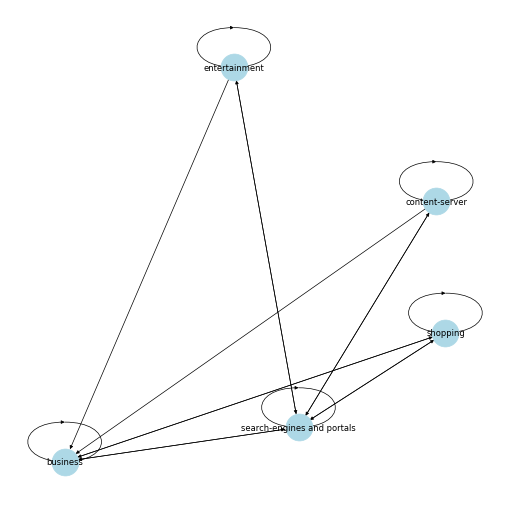

In [25]:
fig = plt.figure(1, figsize=(10, 10), dpi=50)
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='normal', node_size=1500, width=1)

In [26]:
nx.degree_centrality(G)

{'business': 2.0,
 'search-engines and portals': 2.5,
 'shopping': 1.5,
 'content-server': 1.25,
 'entertainment': 1.25}

In [27]:
nx.betweenness_centrality(G)

{'business': 0.08333333333333333,
 'search-engines and portals': 0.5833333333333333,
 'shopping': 0.0,
 'content-server': 0.0,
 'entertainment': 0.0}

In [28]:
nx.closeness_centrality(G)

{'business': 1.0,
 'search-engines and portals': 1.0,
 'shopping': 0.6666666666666666,
 'content-server': 0.5714285714285714,
 'entertainment': 0.5714285714285714}

Creation and estimation of the transition matrix.

In [29]:
transition_matrix = np.zeros((len(nodes), len(nodes))) 

In [30]:
transition_matrix

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [31]:
# Estimation of the transition probabilities
for i in range(len(nodes)):

    total = connections[connections['start_node'] == nodes[i]]['count'].sum()
    for x in range(len(nodes)):
        
        w = connections[(connections['start_node'] == nodes[i]) & (connections['end_node'] == nodes[x])]['count'].head(1)
        value = w.tolist()
        if (len(value)>0):
            transition_matrix[i,x] = value[0]/total

In [32]:
transition_matrix

array([[0.92790937, 0.06041881, 0.        , 0.01167182, 0.        ],
       [0.11100478, 0.69665072, 0.17894737, 0.01052632, 0.00287081],
       [0.32085561, 0.6684492 , 0.01069519, 0.        , 0.        ],
       [0.31067961, 0.12621359, 0.        , 0.5631068 , 0.        ],
       [0.05      , 0.025     , 0.        , 0.        , 0.925     ]])

Prediction of the next states based on the current state.

In [33]:
states = nodes

In [34]:
class MarkovChain:
    def __init__(self, transition_matrix, states):
        self.transition_matrix = np.array(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in range(len(self.states))}

    def next_state(self, current_state):
        return np.random.choice(
            self.states, 
            p=self.transition_matrix[self.index_dict[current_state], :]
        )

    def generate_states(self, current_state, no=10):
        future_states = []
        for i in range(no):
            next_st = self.next_state(current_state)
            future_states.append(next_st)
            current_state = next_st
        return future_states

In [35]:
markov_chain = MarkovChain(transition_matrix=transition_matrix, states=states)

In [36]:
"""
Enter the initial state of the Makov chain
"""
initial_state = 'business'

In [37]:
print("Next state after", initial_state, ":", markov_chain.next_state(current_state=initial_state))

Next state after business : business


In [38]:
"""
Enter the number of steps (or decisions) you want to simulate
"""
steps = 10

In [39]:
simulation_results = markov_chain.generate_states(current_state=initial_state, no=steps)

In [40]:
print("Next,", steps, "states starting from", initial_state ,":", simulation_results)

Next, 10 states starting from business : ['business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business', 'business']


Question 1: How likely will the user go to the 'shopping' state starting in the 'business' state?

Question 2: Assuming three changes of states, how likely will the user follow a sequence of three 'shopping' states starting in the 'shopping' state?

In [41]:
"""
For the hand-on assignment, ajust the values of the code below
"""
question_results = []
for x in range(500):
    simulation_results = markov_chain.generate_states(current_state='shopping', no=3)
    question_results.append(simulation_results)

In [42]:
question_results

[['business', 'business', 'business'],
 ['shopping', 'shopping', 'shopping'],
 ['shopping', 'business', 'business'],
 ['business', 'business', 'business'],
 ['business', 'business', 'business'],
 ['shopping', 'shopping', 'search-engines and portals'],
 ['business', 'business', 'business'],
 ['shopping', 'search-engines and portals', 'search-engines and portals'],
 ['search-engines and portals', 'business', 'business'],
 ['shopping', 'business', 'business'],
 ['shopping', 'shopping', 'business'],
 ['shopping', 'search-engines and portals', 'search-engines and portals'],
 ['search-engines and portals',
  'search-engines and portals',
  'search-engines and portals'],
 ['shopping', 'business', 'business'],
 ['business', 'business', 'business'],
 ['shopping', 'shopping', 'business'],
 ['shopping', 'business', 'business'],
 ['search-engines and portals',
  'search-engines and portals',
  'search-engines and portals'],
 ['shopping', 'shopping', 'shopping'],
 ['shopping', 'shopping', 'shopping

In [43]:
question_results = pd.Series(question_results)

In [44]:
question_results.to_excel('question_results.xlsx', index=False, header=True)

System states distribution after 500 steps.

In [53]:
steps = 100

In [54]:
simulation_results = markov_chain.generate_states(current_state=initial_state, no=steps)

In [55]:
distributions = np.zeros((steps, len(states))) 

In [56]:
cont = 0
for x in simulation_results:
    if (cont>0):
        distributions[cont][:] = distributions[cont-1][:]
    index = nodes.index(x)
    distributions[cont][index] = distributions[cont][index]+1
    cont = cont+1

In [57]:
distributions[steps-1]

array([64., 31.,  4.,  1.,  0.])

In [58]:
y_limit = max(distributions[steps-1])

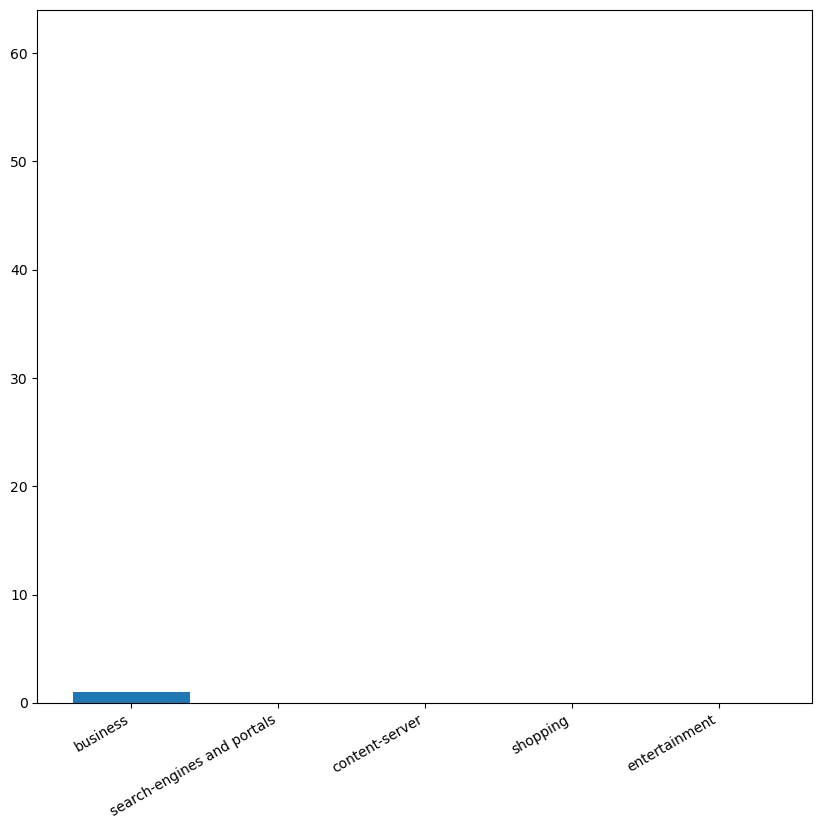

In [59]:
plt.rcParams['savefig.facecolor'] = 'white' # Eliminates the distortion of the graph text

fig, ax = plt.subplots(figsize=(10,9))

N = len(states) # Number of bars

data = np.zeros(len(states)) # Initial data

bars = ax.bar(states, data) # Setting up the bar chart

ax.tick_params(axis='x', labelrotation=30)
# Eventually, this shouldn't be needed and an `ha` argument should
# be available for the above.
plt.xticks(ha='right')

ax.set_ylim(0, y_limit) # Set the axis limits

step = [0] # Keep track of the frame (chart) we want to visualize 

def update(frame, step):

    data = distributions[step[0]][:] 

    for bar, h in zip(bars, data):
        bar.set_height(h)
        
    step[0] += 1  # Increase the step value by 1
    return bars

# Known bug - The animation ends one frame before the end.

ani = FuncAnimation(fig, update, frames=steps-2, interval=100, fargs=(step,), repeat=False) # Create the animation

In [60]:
# Display the animation.
ani

## Assignment 

### Conceptual Option

Find a real-world system that can be modelled by a Markov Chain (e.g., queueing systems, stock prices, board games). Describe the system, identify the states and possible transitions, and diagram the Markov chain. Submit a 2-3 page Word document with the descriptions, diagrams, and insights. Reference the consulted sources using the APA format.

### Hands-on Option

Select the user ID 1137 and recreate the analysis followed in class. Write three questions following the format of question 2 of the Jupyter notebook, and answer them using Markov chains and the provided code. Adjust the question elements (categories, patterns, steps, etc.). For example, vary the expected pattern or the number of consecutive categories. Submit a 1-2 page Word document with the questions, answers, graphs, and insights. Submit the produced Excel files. Reference the consulted sources using the APA format.